# Detect the License plates of a Car using OpenCV and the HaarCascade_russian_plate_number XML file

# Uploading the required file to Colab

In [1]:
from google.colab import files
files.upload()

Saving car.jpg to car.jpg
Saving haarcascade_russian_plate_number.xml to haarcascade_russian_plate_number.xml


{'car.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01\x84\x00\x00\x00lwtpt\x00\x00\x01\xf0\x00\x00\x00\x14bkpt\x00\x00\x02\x04\x00\x00\x00\x14rXYZ\x00\x00\x02\x18\x00\x00\x00\x14gXYZ\x00\x00\x02,\x00\x00\x00\x14bXYZ\x00\x00\x02@\x00\x00\x00\x14dmnd\x00\x00\x02T\x00\x00\x00pdmdd\x00\x00\x02\xc4\x00\x00\x00\x88vued\x00\x00\x03L\x00\x00\x00\x86view\x00\x00\x03\xd4\x00\x00\x00$lumi\x00\x00\x03\xf8\x00\x00\x00\x14meas\x00\x00\x04\x0c\x00\x00\x00$tech\x00\x00\x040\x00\x00\x00\x0crTRC\x00

# Importing the Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and Pre-process the image



In [4]:
carplate_img = cv2.imread('/content/car.jpg')

#convert color to RGB
carplate_img_rgb = cv2.cvtColor(carplate_img, cv2.COLOR_BGR2RGB)

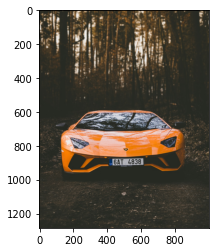

In [5]:
#Display the image
plt.imshow(carplate_img_rgb)

In [8]:
#Enlarging the display for better view
def enlarge_plt_display(image, scale_factor):
  width = int(image.shape[1] * scale_factor / 100)
  height = int(image.shape[0] * scale_factor / 100)
  dim = (width, height)
  plt.figure(figsize = dim)
  plt.axis('off')
  plt.imshow(image)

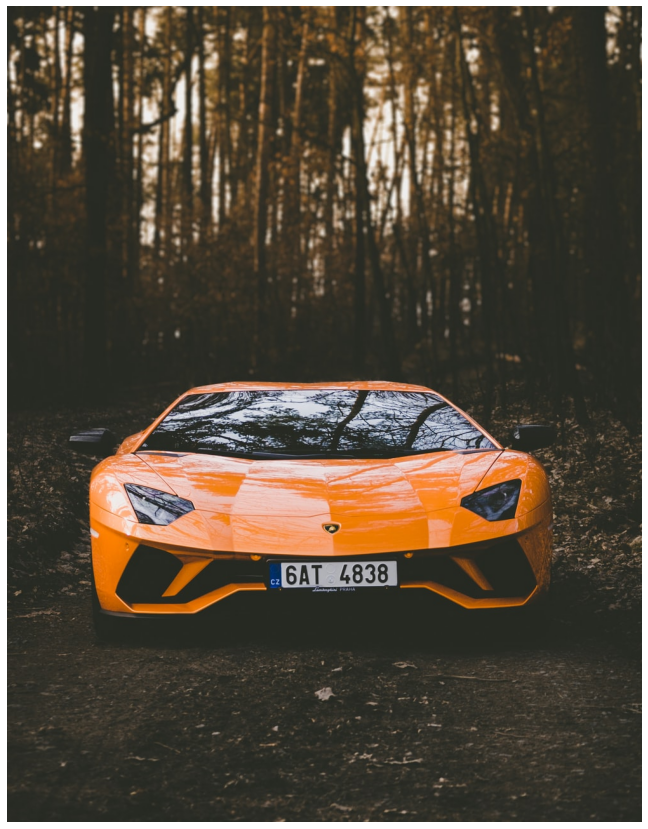

In [10]:
enlarge_plt_display(carplate_img_rgb, 1.2)

# Create a Classifier using the HaarCascade_russian_plate_number.xml file

In [11]:
carplate_haar_cascade = cv2.CascadeClassifier('/content/haarcascade_russian_plate_number.xml')

# Function to Detect the Car License Plates using the Classifier

In [14]:
def carplate_detect(image):
  carplate_overlay = image.copy() #Create overlay to display rectangle around detected car plate
  carplate_rect = carplate_haar_cascade.detectMultiScale(carplate_overlay, scaleFactor=1.1, minNeighbors=5)

  for x,y,w,h in carplate_rect:
    cv2.rectangle(carplate_overlay, (x,y), (x+w, y+h), color=(0, 0, 255), thickness=5)

  return carplate_overlay

# Displaying the results

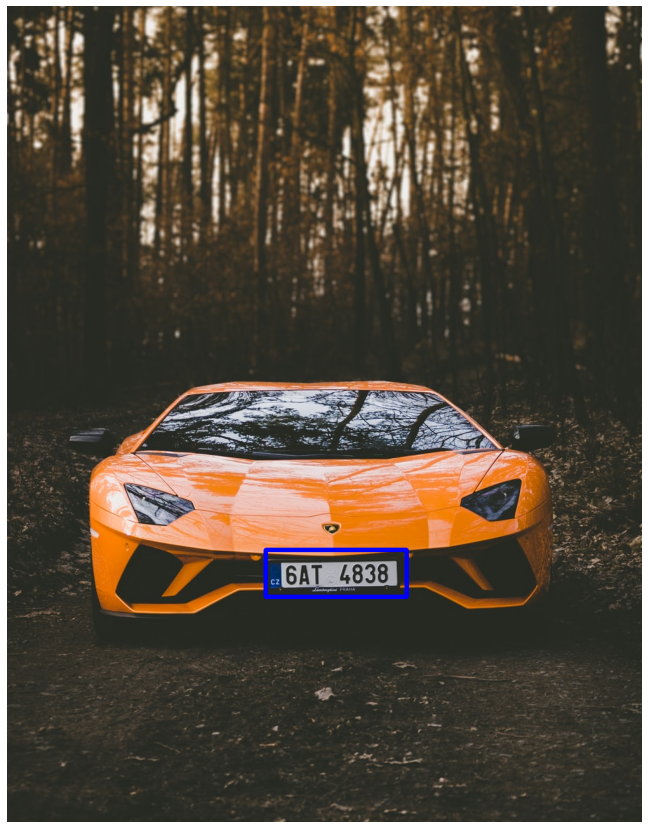

In [15]:
detected_carplate_img = carplate_detect(carplate_img_rgb)
enlarge_plt_display(detected_carplate_img, 1.2)